In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from utils import *
from datasets import folder
from inception_score import *

In [2]:
def plot_distribution(mu, sigma):
    x = np.linspace(-5, 5, 5000)
    y_pdf = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y_pdf, label='pdf')
    plt.legend()
    plt.show()

## Digits Transfer

In [3]:
SVHN_transform = transforms.Compose([transforms.ToTensor(), NormalizeRangeTanh()])
mnist = folder.FolderDataset(data_dir='./results/digits/evals', transform=SVHN_transform)
mean, std = get_inception_score(mnist, cuda=False, batch_size=64, resize=True, splits=10)

/anaconda2/envs/cs7643/lib/python2.7/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/anaconda2/envs/cs7643/lib/python2.7/site-packages/torch/nn/functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
inception_score.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


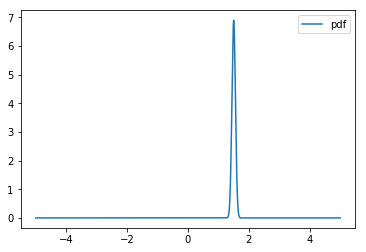

In [4]:
plot_distribution(mean, std)